<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Practice/Week_4_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [16]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-12-27 16:18:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-12-27 16:18:06 (109 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [17]:
data = open("/tmp/irish-lyrics-eof.txt").read()
corpus = data.lower().split("\n")

In [18]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
print(total_words)


2690


In [19]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# padding sequences
max_length = max([len(x) for x in input_sequences])
padded_sequences = np.array(pad_sequences(input_sequences, maxlen=max_length, padding="pre"))

# making inputs and outputs for our dataset
xs, labels = padded_sequences[:, :-1], padded_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [20]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [21]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [22]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [23]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# print(tokenizer.word_index)

In [24]:
# define your model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 6s 11ms/step - loss: 6.9916 - accuracy: 0.0576
Epoch 2/100
377/377 [==============================] - 4s 11ms/step - loss: 6.2371 - accuracy: 0.0744
Epoch 3/100
377/377 [==============================] - 4s 11ms/step - loss: 5.9847 - accuracy: 0.0787
Epoch 4/100
377/377 [==============================] - 4s 11ms/step - loss: 5.7150 - accuracy: 0.0930
Epoch 5/100
377/377 [==============================] - 4s 11ms/step - loss: 5.2890 - accuracy: 0.1142
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 4.9050 - accuracy: 0.1339
Epoch 7/100
377/377 [==============================] - 4s 11ms/step - loss: 4.4367 - accuracy: 0.1696
Epoch 8/100
377/377 [==============================] - 4s 11ms/step - loss: 4.0323 - accuracy: 0.2074
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 3.6239 - accuracy: 0.2624
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 3.234

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

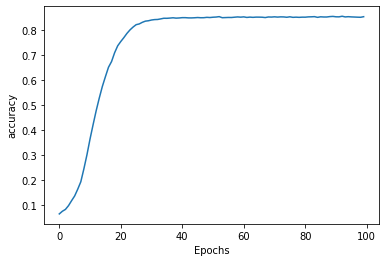

In [26]:
plot_graphs(history, 'accuracy')


In [27]:
seed_text = "Laurence went to dublin"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_length-1, padding="pre")
    predicted = model.predict_classes(token_list)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if predicted == index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin and now and i asked her to be love you was and go free friends new mountains still more bloomed in killarney pity in fray loud loving boreen other and tree doesnt sat me and down to wild ive warm corporal casey the led prince tree of blarney at fray all summers tree of a fever died died very blarney chop brian play down to the sea is right had they had best and i was a hobble in your eye ever beaming hearted friends for tears for dont until them from fray here until goblins meself youll see me
